# Exploring a Single Subject

The purpose of this notebook is to explore a single subject from the Pathstone YAC dataset.

Code snippets and functions are intended to be left alone and run as a standalone application.

Below are the common configurations that a student could reasonably expect to change during exploration. Each will contain a brief explanation as to their intended use.

In [1]:
# Subject to run the picking procedure on
subject_id = '1070'

In [2]:
# EEG Configuration
filter_freqs = (1.0, 30.0) # Filter data from (low_freq, high_freq)
channel_interest = ['E75', 'E6', 'E62'] # Channels to pick for peaks
condition_interest = ['VO21', 'combine'] # Conditions to pick for peaks
epoch_tmin = -0.1 # Baseline to stimulus onset in seconds, negative implies before stimulus
epoch_tmax = 1.0 # Duration after stimulus of epoch
reject_criteria = {'eeg': 200e-6} # Reject trials that have X-microvolt peak to peak differences
p1_def   = (0.060, 0.150) # P1 peak interval definition in seconds
n170_def = (0.130, 0.220) # N170 peak interval definition in seconds
p3_def   = (0.250, 0.850) # P3 peak interval definition in seconds

# Plotting Configuration
plot_raw        = False # If true, open raw recording scrollplot
plot_components = False # If true, open component scrollplot
plot_cleaned    = False # If true, open cleaned recording scrollplot

save_epoched = False # If true, saves the epoched and cleaned version of the subject to file for further processing

In [3]:
import mne
import pandas as pd
import pylossless as ll
import matplotlib.pyplot as plt
mne.viz.set_browser_backend('qt')

project_path = '/media/tyler/PathstoneProject/PathstoneYAC'
raw_path = f'{project_path}/sub-YAC{subject_id}/eeg/sub-YAC{subject_id}_task-AttnCtrl_eeg.edf'
derivative_path = f'{project_path}/derivatives/pylossless/sub-YAC{subject_id}/eeg/sub-YAC{subject_id}_task-afd_eeg.edf'

ll_state = ll.LosslessPipeline()
ll_state = ll_state.load_ll_derivative(derivative_path)
ll_state.raw.info['bads'] = ll_state.flags['ch'].get_flagged()
ll_state.ica2.exclude = [index for index,comp in ll_state.flags['ic'].iterrows() if comp['ic_type'] in ['eog', 'ecg', 'muscle', 'line_noise', 'channel_noise']]
ll_state

Using qt as 2D backend.
Extracting EDF parameters from /media/tyler/PathstoneProject/PathstoneYAC/derivatives/pylossless/sub-YAC1070/eeg/sub-YAC1070_task-afd_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /media/tyler/PathstoneProject/PathstoneYAC/derivatives/pylossless/sub-YAC1070/eeg/sub-YAC1070_task-afd_events.tsv.
Reading channel info from /media/tyler/PathstoneProject/PathstoneYAC/derivatives/pylossless/sub-YAC1070/eeg/sub-YAC1070_task-afd_channels.tsv.
Reading electrode coords from /media/tyler/PathstoneProject/PathstoneYAC/derivatives/pylossless/sub-YAC1070/eeg/sub-YAC1070_space-CapTrak_electrodes.tsv.
Not fully anonymizing info - keeping his_id, sex, and hand info
Reading /media/tyler/PathstoneProject/PathstoneYAC/derivatives/pylossless/sub-YAC1070/eeg/sub-YAC1070_task-afd_ica1_ica.fif ...
Now restoring ICA solution ...
Ready.
Reading /media/tyler/PathstoneProject/PathstoneYAC/derivatives/pylossless/sub-YAC1070/

/home/tyler/Documents/pylossless/pylossless/pipeline.py:1199: RuntimeWarning: participants.tsv file not found for /media/tyler/PathstoneProject/PathstoneYAC/derivatives/pylossless/sub-YAC1070/eeg/sub-YAC1070_task-afd_eeg.edf
  self.raw = mne_bids.read_raw_bids(derivatives_path)


Raw,"('/media/tyler/PathstoneProject/PathstoneYAC/derivatives/pylossless/sub-YAC1070/eeg/sub-YAC1070_task-afd_eeg.edf',)"
Config,/media/tyler/PathstoneProject/PathstoneYAC/derivatives/pylossless/sub-YAC1070/eeg/sub-YAC1070_task-afd_ll_config.yaml
Noisy,None
Bridged,['E93' 'E98' 'E100' 'E101']
Uncorrelated,None
Rank,['E81']
EOG (Eye),"['ICA001', 'ICA003', 'ICA026', 'ICA027', 'ICA029']"
ECG (Heart),[]
Muscle,"['ICA017', 'ICA020', 'ICA044', 'ICA045', 'ICA053', 'ICA055', 'ICA060', 'ICA064', 'ICA066', 'ICA080', 'ICA087']"
Line Noise,[]
Channel Noise,[]


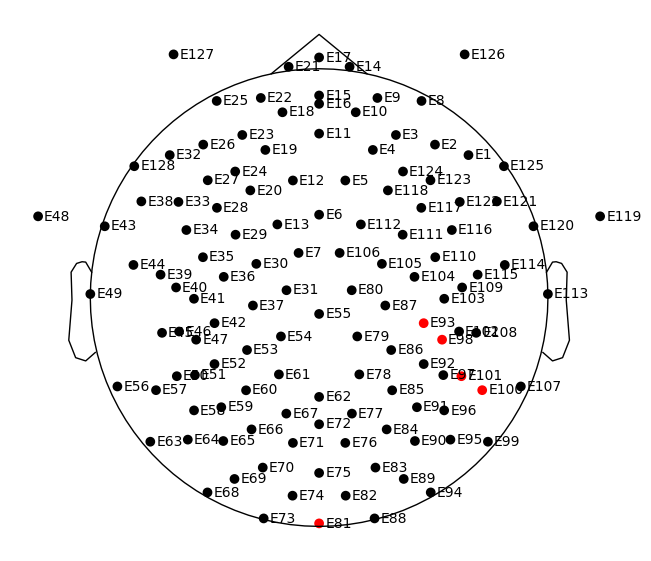

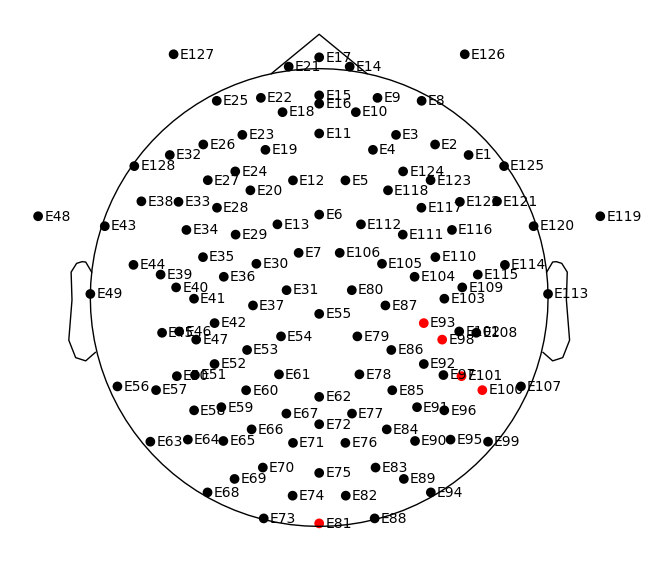

In [5]:
ll_state.raw.plot_sensors(show_names=True)

In [ ]:
%matplotlib qt
if plot_raw:
    ll_state.raw.plot()

In [ ]:
%matplotlib qt
if plot_components or True:
    fig = ll_state.ica2.plot_sources(ll_state.raw, theme='light')

In [4]:
cleaned_state = ll_state.raw.copy()
cleaned_state.load_data()
ll_state.ica2.apply(cleaned_state)
cleaned_state = cleaned_state.interpolate_bads()
cleaned_state = cleaned_state.filter(l_freq=filter_freqs[0], h_freq=filter_freqs[1])

Reading 0 ... 831499  =      0.000 ...  1662.998 secs...
Applying ICA to Raw instance
    Transforming to ICA space (122 components)
    Zeroing out 16 ICA components
    Projecting back using 123 PCA components
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 123 sensor positions
Interpolating 5 sensors
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:    2.3s finished


In [ ]:
%matplotlib qt
if plot_cleaned or True:
    cleaned_state.plot(theme='light')

In [5]:
%matplotlib qt
raw_data = mne.io.read_raw_edf(f'sub-YAC{subject_id}/eeg/sub-YAC{subject_id}_task-AttnCtrl_eeg.edf')
base_events, event_dict = mne.events_from_annotations(raw_data)

# Programmatically relabel events
event_dict['VO24/combine'] = event_dict.pop('VO24')
event_dict['VO25/combine'] = event_dict.pop('VO25')

event_dict

# inspect = raw_data.copy().crop(tmin=200, tmax=800)
# base_events, event_dict = mne.events_from_annotations(inspect)
# fig = mne.viz.plot_events(
#     base_events, event_id=event_dict, sfreq=inspect.info["sfreq"], first_samp=inspect.first_samp
# )

Extracting EDF parameters from /media/tyler/PathstoneProject/PathstoneYAC/sub-YAC1070/eeg/sub-YAC1070_task-AttnCtrl_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['2cor', '2inc', '3cor', '3inc', '4cor', '4inc', 'DV31', 'DV32', 'DV33', 'DV34', 'DV35', 'ER61', 'ER62', 'GN41', 'GN42', 'SR11', 'SR12', 'TRSP', 'VO21', 'VO22', 'VO23', 'VO24', 'VO25', 'bgin', 'boundary', 'isi+', 'resp', 'stm+', 'stm-']


{'2cor': 1,
 '2inc': 2,
 '3cor': 3,
 '3inc': 4,
 '4cor': 5,
 '4inc': 6,
 'DV31': 7,
 'DV32': 8,
 'DV33': 9,
 'DV34': 10,
 'DV35': 11,
 'ER61': 12,
 'ER62': 13,
 'GN41': 14,
 'GN42': 15,
 'SR11': 16,
 'SR12': 17,
 'TRSP': 18,
 'VO21': 19,
 'VO22': 20,
 'VO23': 21,
 'bgin': 24,
 'boundary': 25,
 'isi+': 26,
 'resp': 27,
 'stm+': 28,
 'stm-': 29,
 'VO24/combine': 22,
 'VO25/combine': 23}

In [6]:
event_dict = {
    'VO21': 19,
    'VO22': 20,
    'VO23': 21,
    'VO24/combine': 22,
    'VO25/combine': 23
}
new_events = [item for item in base_events if item[2] in event_dict.values()]

In [7]:
epochs = mne.Epochs(
    cleaned_state,
    new_events,
    picks=channel_interest,
    event_id=event_dict,
    tmin=epoch_tmin,
    tmax=epoch_tmax,
    reject=reject_criteria,
    preload=True,
    event_repeated='merge',
)
if save_epoched:
    epochs.save(f'yac_{subject_id}_pylqcr_eeg.fif', overwrite=True)
epochs

Not setting metadata
350 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 350 events and 551 original time points ...
18 bad epochs dropped


Number of events,332
Events,VO21: 47VO22: 46VO23: 192VO24/combine: 25VO25/combine: 22
Time range,-0.100 – 1.000 s
Baseline,-0.100 – 0.000 s


In [ ]:
%matplotlib inline
epochs['VO24'].plot()

In [ ]:
%matplotlib inline

evokeds = {}
for chan in channel_interest:
    for cond in condition_interest:
        evokeds[cond] = epochs[cond].average()

    fig = mne.viz.plot_compare_evokeds(evokeds, picks=chan, combine='mean')

In [ ]:
# The below functions are helper functions for peak picking

def max_index_and_value(series, find_max=True):
    if find_max:
        index = series.idxmax()
    else:
        index = series.idxmin()
    return index, series[index]

def on_key(event, channel, condition, erp_frame): # event.key, event.x, event.y, event.xdata, event.ydata
    key_comp_order = {'1': 'p1', '2': 'n170', '3': 'p3'}
    if event.key in ['1', '2', '3']:
        closest_index = (erp_frame.index.to_series() - event.xdata).abs().idxmin()
        row_number = erp_frame.index.get_loc(closest_index)
        override_tuple =  max_index_and_value(erp_frame.iloc[range(row_number - 25, row_number + 25)], event.key in ['1', '3'])
        # erp_info[f'{condition}_{channel}_{key_comp_order[event.key]}'] = override_tuple
        erp_info[channel][condition][key_comp_order[event.key]] = override_tuple
        display(erp_info[channel][condition])

def is_figure_open(fig):
    try:
        while fig.number in plt.get_fignums():
            plt.pause(0.1)
    except:
        plt.close(fig.number)
        raise

In [ ]:
erp_info = {}

evokeds = {}
erp_frames = {}
for chan in channel_interest:
    erp_info[chan] = {}
    for cond in condition_interest:
        erp_info[chan][cond] = {}
        evokeds[cond] = epochs[cond].average()
        erp_frames[f'{cond}_{chan}'] = evokeds[cond].to_data_frame().set_index('time')[chan]
        erp_info[chan][cond]['p1'] = max_index_and_value(erp_frames[f'{cond}_{chan}'].loc[p1_def[0]:p1_def[1]])
        erp_info[chan][cond]['n170'] = max_index_and_value(erp_frames[f'{cond}_{chan}'].loc[n170_def[0]:n170_def[1]], find_max=False)
        erp_info[chan][cond]['p3'] = max_index_and_value(erp_frames[f'{cond}_{chan}'].loc[p3_def[0]:p3_def[1]])
erp_info

In [ ]:
%matplotlib qt

import time
from functools import partial

for chan in channel_interest:
    for cond in condition_interest:
        on_key_partial = partial(on_key, channel=chan, condition=cond, erp_frame=erp_frames[f'{cond}_{chan}'])
        comp_lines = [erp_info[chan][cond][comp][0] for comp in ['p1', 'n170', 'p3']]
        comp_lines.insert(0, 0) # Make sure zero is still graphed
        fig = mne.viz.plot_compare_evokeds(evokeds[cond], picks=chan, vlines=comp_lines)    
        cid = fig[0].canvas.mpl_connect('key_press_event', on_key_partial)        
        display(erp_info[chan][cond])
        is_figure_open(fig[0])

#### Break point

Confirm the values in the `erp_info` dictionary before running the final cell and writing the peaks to file.

In [ ]:
for chan in erp_info.keys():
    print('Channel: ', chan)
    for cond in erp_info[chan].keys():
        print('\tCondition: ', cond)
        for comp in erp_info[chan][cond].keys():
            print(f'\t\t{comp}\t{erp_info[chan][cond][comp][0]}\t{erp_info[chan][cond][comp][1]:.2f}')